# About the post
In the field of Machine Learning, there exist various techniques to identify outliers. In this blog post, I will be demonstrating the use of IQR and DBSCAN methods to detect outliers.  
For the purpose of this demonstration, I will be utilizing a dataset that contains information on the height and weight of 200 individuals.

In [103]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/simonlast/d20a53af004bfd7cd912403884ce80d2/raw/c92846e3387f11abc7e318db88c7aca6ecec1b4c/height_weight_data.csv")
df.rename(columns = {' Height (Inches)':'Height', ' Weight (Pounds)': 'Weight'}, inplace=True)
df.head()

,Index,Height,Weight
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


<Axes: xlabel='Height', ylabel='Weight'>

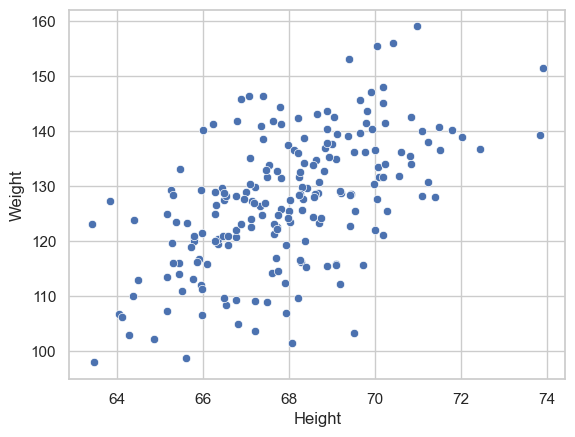

In [104]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.scatterplot(data = df, x = "Height", y = "Weight")

# Inter-Quartile Range (IQR)

IQR is a method commonly used to detect outliers in a dataset. The main idea behind the method is to use quartiles to exclude outliers. To implement this method, we should follow the steps below:

## 1. Defining quatiles
First, we should derive quatiles of a variable. I use 75% and 25% quartiles.  

![Boxplot](https://panmath7.files.wordpress.com/2017/04/how_to_find_iqr_boxplot_image.jpg)

In [105]:
q1_h = df['Height'].quantile(0.25)
q3_h = df['Height'].quantile(0.75)

q1_w = df['Weight'].quantile(0.25)
q3_w = df['Weight'].quantile(0.75)

## 2. IQR Range
I define a new variable to detect datapoint between 25% and 75% quantiles, then, create a range to keep the datapoints in this range. 

$Fence_{Lower}  = Q1 - \alpha \times (Q3-Q1)$  
$Fence_{Upper}  = Q3 + \alpha \times (Q3-Q1)$

In [106]:
alpha = 0.5

iqr_h = q3_h - q1_h
lower_fence_h = q1_h - alpha*iqr_h
upper_fence_h = q3_h + alpha*iqr_h

iqr_w = q3_w - q1_w
lower_fence_w = q1_w - alpha*iqr_w
upper_fence_w = q3_w + alpha*iqr_w

![IQR](https://i.pinimg.com/736x/46/27/08/462708d2dd3266b85f2b988452ced6ff.jpg)

## 3. Detecting Outliers
In this step, I label the datapoint that are out of the range.

In [107]:
for i in range(len(df)):
    if df.loc[i, 'Height'] < lower_fence_h or df.loc[i, 'Height'] > upper_fence_h:  # if outlier
        df.loc[i, "out_" + 'Height'] = 1
    else:
            df.loc[i, "out_" + 'Height'] = 0


for i in range(len(df)):
    if df.loc[i, 'Weight'] < lower_fence_w or df.loc[i, 'Weight'] > upper_fence_w:  # if outlier
        df.loc[i, "out_" + 'Weight'] = 1
    else:
            df.loc[i, "out_" + 'Weight'] = 0

df['outliers'] = 0
df.loc[(df['out_Height'] == 1) & (df['out_Weight'] == 1), 'outliers'] = 1

In [108]:
df.outliers.mean()

0.045

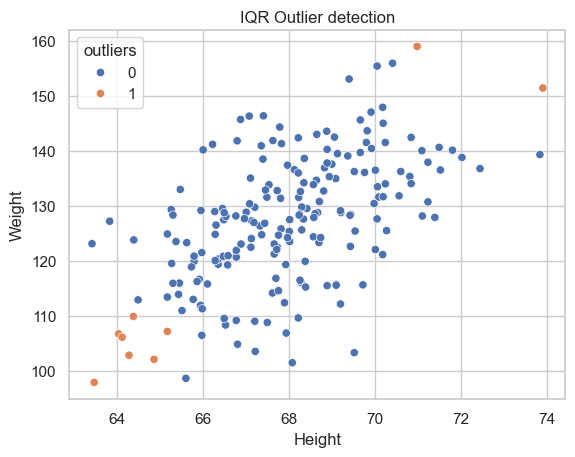

In [109]:
sns.scatterplot(data = df, 
                x = "Height", 
                y = "Weight", 
                hue='outliers').set_title("IQR Outlier detection");

# DBSCAN
DBSCAN is another method used to detect anomalies and outliers. In the following, you can see how DBSCAN detects outliers and compare the results with IQR.

In [110]:
import numpy as np
from sklearn.cluster import DBSCAN 

distance = 3
neighbor = 10


data_set = df[['Height','Weight']]
data_set = np.nan_to_num(data_set)
db = DBSCAN(eps=distance, min_samples=neighbor).fit(data_set)
mask = np.zeros_like(db.labels_, dtype=bool)
df["Cluster"]=db.labels_

df.Cluster.value_counts()



Cluster
 0    188
-1     12
Name: count, dtype: int64

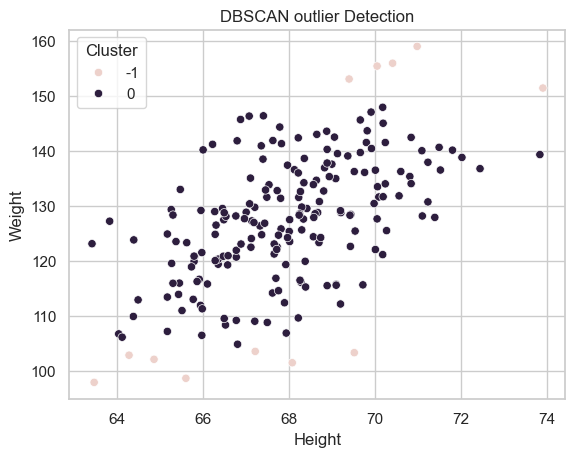

In [111]:
sns.scatterplot(data = df, 
                x = "Height", 
                y = "Weight", 
                hue='Cluster').set_title('DBSCAN outlier Detection');
